Sentiment Analysis

In [41]:
import torch
import random
import numpy as np
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [42]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# ---------------------------
# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# ---------------------------
# Define a function to clean text: lowercasing, removing punctuation and stopwords
def clean_text(text):
    text = str(text)  # Ensure input is a string
    text = text.lower()  # Lowercase the text
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = [word for word in text.split() if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1028)>


In [56]:
# Load CSV files with proper encoding
train_df = pd.read_csv("train.csv", encoding="latin1")
test_df  = pd.read_csv("test.csv", encoding="latin1")

# Ensure the sentiment column is uniformly typed as string
train_df['sentiment'] = train_df['sentiment'].astype(str)
test_df['sentiment']  = test_df['sentiment'].astype(str)

# Remove rows where the sentiment is 'nan'
test_df = test_df[test_df['sentiment'] != "nan"]

# ---------------------------
# Clean the text column (assuming the text column is named 'text')
train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text']  = test_df['text'].apply(clean_text)

# Optional: Check the cleaned text
print("Sample cleaned text (train):")
print(train_df['clean_text'].head())

# ---------------------------
# Create TF-IDF features from the cleaned text
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_df['clean_text'])
X_test  = tfidf_vectorizer.transform(test_df['clean_text'])

# Set target labels
y_train = train_df['sentiment']
y_test  = test_df['sentiment']
print("\n")
print(train_df['sentiment'].value_counts())
print(test_df['sentiment'].value_counts())

Sample cleaned text (train):
0                          id responded going
1                     sooo sad miss san diego
2                               boss bullying
3                       interview leave alone
4    sons couldnt put releases already bought
Name: clean_text, dtype: object


sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64
sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64


In [57]:
# Define a parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]}

rf_clf = RandomForestClassifier(random_state=42)

In [58]:
# Set up GridSearchCV
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}


In [59]:
# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# ---------------------------
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.7133559705715903
Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.65      0.69      1001
     neutral       0.67      0.72      0.69      1430
    positive       0.76      0.77      0.76      1103

    accuracy                           0.71      3534
   macro avg       0.72      0.71      0.71      3534
weighted avg       0.72      0.71      0.71      3534



In [60]:
y_pred_sample = clf.predict(X_test_combined[:5])
print("Sample predictions:", y_pred_sample)
print("Corresponding true labels:", y_test[:5].values)

Sample predictions: ['neutral' 'neutral' 'neutral' 'positive' 'neutral']
Corresponding true labels: ['neutral' 'positive' 'negative' 'positive' 'positive']


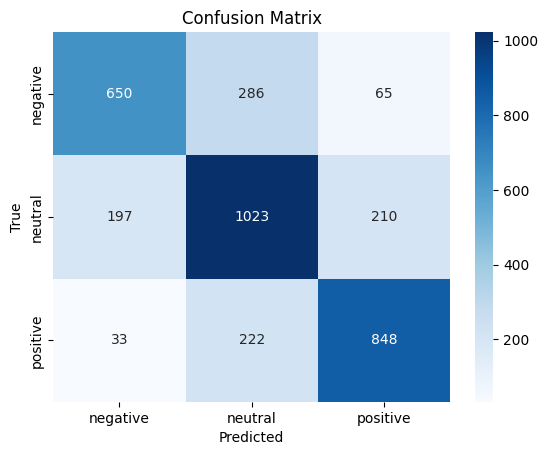

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Using bag of words

In [62]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false" 

import random
import numpy as np
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)

# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1028)>


In [63]:
# Define a function to clean text: lowercasing, remove punctuation, and remove stopwords
def clean_text(text):
    text = str(text)  # Ensure input is a string
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = [word for word in text.split() if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# ---------------------------
# Load CSV files (train.csv and test.csv) with proper encoding
train_df = pd.read_csv("train.csv", encoding="latin1")
test_df  = pd.read_csv("test.csv", encoding="latin1")

# Ensure the sentiment column is uniformly typed as string
train_df['sentiment'] = train_df['sentiment'].astype(str)
test_df['sentiment']  = test_df['sentiment'].astype(str)

# ---------------------------
# Clean the text column (assuming the column with the tweet text is named 'text')
train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text']  = test_df['text'].apply(clean_text)

print("Sample cleaned text (train):")
print(train_df['clean_text'].head())

Sample cleaned text (train):
0                          id responded going
1                     sooo sad miss san diego
2                               boss bullying
3                       interview leave alone
4    sons couldnt put releases already bought
Name: clean_text, dtype: object


TF_IDF Features

TF_IDF Features

TF_IDF Features

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['clean_text'])
X_test_tfidf  = tfidf_vectorizer.transform(test_df['clean_text'])

Sentence Embeedings

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['clean_text'])
X_test_tfidf  = tfidf_vectorizer.transform(test_df['clean_text'])

Combine both Features

In [66]:
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense  = X_test_tfidf.toarray()

# Concatenate features along the columns (axis=1)
X_train_combined = np.concatenate((X_train_tfidf_dense, X_train_sent), axis=1)
X_test_combined  = np.concatenate((X_test_tfidf_dense, X_test_sent), axis=1)

# ---------------------------
# Set target labels
y_train = train_df['sentiment']
y_test  = test_df['sentiment']

In [67]:
# Train a Random Forest Classifier on the combined features
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_combined, y_train)

RandomForestClassifier(random_state=42)

In [68]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.4407061266874351
Classification Report:
              precision    recall  f1-score   support

         nan       0.00      0.00      0.00      1281
    negative       0.70      0.39      0.51      1001
     neutral       0.33      0.83      0.48      1430
    positive       0.79      0.49      0.60      1103

    accuracy                           0.44      4815
   macro avg       0.46      0.43      0.40      4815
weighted avg       0.42      0.44      0.38      4815



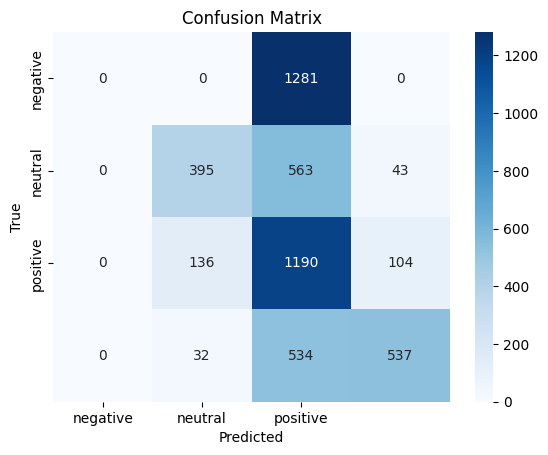

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()